In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('final_le_wagon_project_data.csv')

In [7]:
df.head(15)

,sr_no,gender,category,grade_10,grade_12,graduation_score,graduation_type,admission_test_score,work_exp_months,shortlist_uni_1,...,shortlist_uni_2,admit_uni_2,shortlist_uni_3,admit_uni_3,shortlist_uni_4,admit_uni_4,shortlist_uni_5,admit_uni_5,shortlist_uni_6,admit_uni_6
0,1,Male,General,82.0,86.5,77.4,Engineer,92.43,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Female,General,95.0,95.6,85.4,Engineer,94.29,16,0,...,0,0,0,0,0,0,1,0,0,0
2,3,Female,General,93.1,91.6,79.2,Non-Engineer,92.52,4,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Male,General,91.8,89.7,80.7,Non-Engineer,96.57,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Female,General,96.0,86.2,92.4,Non-Engineer,91.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Male,General,87.4,92.6,79.9,Engineer,99.63,21,0,...,0,0,1,0,0,0,0,0,0,0
6,7,Male,NC_OBC,99.3,89.7,73.6,Engineer,95.01,25,0,...,1,1,0,0,1,1,1,1,1,1
7,8,Male,General,95.0,86.8,71.1,Engineer,99.26,26,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Male,General,87.4,79.6,70.1,Engineer,99.22,28,0,...,0,0,0,0,0,0,0,0,1,0
9,10,Female,NC_OBC,85.5,84.3,70.9,Non-Engineer,91.50,14,0,...,0,0,0,0,0,0,1,1,0,0


In [10]:
df.category.value_counts()

General    2760
NC_OBC      703
SC          242
EWS         186
ST           49
Name: category, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sr_no                 3940 non-null   int64  
 1   gender                3940 non-null   object 
 2   category              3940 non-null   object 
 3   grade_10              3940 non-null   float64
 4   grade_12              3940 non-null   float64
 5   graduation_score      3940 non-null   float64
 6   graduation_type       3940 non-null   object 
 7   admission_test_score  3940 non-null   float64
 8   work_exp_months       3940 non-null   int64  
 9   shortlist_uni_1       3940 non-null   int64  
 10  admit_uni_1           3940 non-null   int64  
 11  shortlist_uni_2       3940 non-null   int64  
 12  admit_uni_2           3940 non-null   int64  
 13  shortlist_uni_3       3940 non-null   int64  
 14  admit_uni_3           3940 non-null   int64  
 15  shortlist_uni_4      

In [13]:
df = df.drop(['sr_no', 'admit_uni_1', 'admit_uni_2', 'admit_uni_3', 'admit_uni_4', 'admit_uni_5', 'admit_uni_6'], axis=1)
df = df.dropna().copy()

In [14]:
df = pd.get_dummies(df, columns=['category'], drop_first=True)
df.head(10)

,gender,grade_10,grade_12,graduation_score,graduation_type,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
0,Male,82.0,86.5,77.4,Engineer,92.43,30,0,0,0,0,0,0,1,0,0,0
1,Female,95.0,95.6,85.4,Engineer,94.29,16,0,0,0,0,1,0,1,0,0,0
2,Female,93.1,91.6,79.2,Non-Engineer,92.52,4,0,0,0,0,0,0,1,0,0,0
3,Male,91.8,89.7,80.7,Non-Engineer,96.57,0,0,0,0,0,0,0,1,0,0,0
4,Female,96.0,86.2,92.4,Non-Engineer,91.00,0,0,0,0,0,0,0,1,0,0,0
5,Male,87.4,92.6,79.9,Engineer,99.63,21,0,0,1,0,0,0,1,0,0,0
6,Male,99.3,89.7,73.6,Engineer,95.01,25,0,1,0,1,1,1,0,1,0,0
7,Male,95.0,86.8,71.1,Engineer,99.26,26,0,0,0,0,0,0,1,0,0,0
8,Male,87.4,79.6,70.1,Engineer,99.22,28,0,0,0,0,0,1,1,0,0,0
9,Female,85.5,84.3,70.9,Non-Engineer,91.50,14,0,0,0,0,1,0,0,1,0,0


In [15]:
df.describe()

,grade_10,grade_12,graduation_score,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
count,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000
mean,90.377995,87.041371,77.094213,92.270982,9.507360,0.096701,0.148985,0.104315,0.203299,0.272843,0.220305,0.700508,0.178426,0.061421,0.012437
std,6.264717,8.473028,8.907866,8.770741,12.302843,0.295587,0.356119,0.305707,0.402505,0.445477,0.414505,0.458094,0.382920,0.240132,0.110838
min,52.300000,52.600000,50.000000,27.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.400000,82.600000,71.200000,90.057500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,92.400000,89.200000,77.500000,95.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,95.000000,93.400000,83.400000,98.090000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([2.065e+03, 1.000e+02, 1.120e+02, 1.270e+02, 1.880e+02, 2.670e+02,
        1.150e+02, 8.700e+01, 1.100e+02, 3.010e+02, 1.460e+02, 8.400e+01,
        3.500e+01, 7.800e+01, 4.200e+01, 2.800e+01, 1.100e+01, 6.000e+00,
        1.600e+01, 1.000e+01, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ,
        28.6, 31.2, 33.8, 36.4, 39. , 41.6, 44.2, 46.8, 49.4, 52. , 54.6,
        57.2, 59.8, 62.4, 65. , 67.6, 70.2, 72.8, 75.4, 78. ]),
 <BarContainer object of 30 artists>)

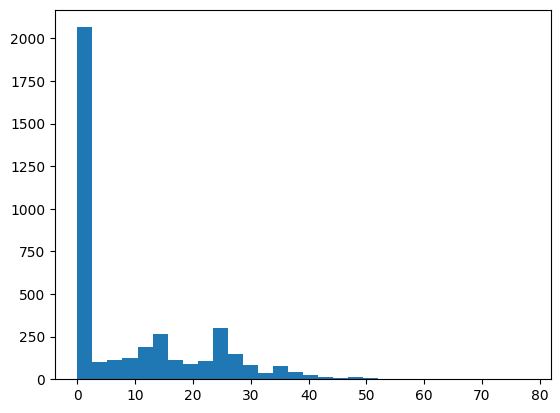

In [17]:
plt.hist(df.work_exp_months, bins = 30)

In [18]:
# Rename the column to gender_female then values are 1 and 0. 
# Same for non-engineer
# Scale Grade 10, 12, Graduation scores after looking at the histograms
# Scale test score - check for outliers. Robust scaler
# Work experience months - Robust scaler
# Category - One hot encoding
# Class_weight balance for class imbalance

In [19]:
df.replace(to_replace = "Male", value = "0", inplace = True)
df.replace(to_replace = "Female", value = "1", inplace = True)
df.replace(to_replace = "Engineer", value = "0", inplace = True)
df.replace(to_replace = "Non-Engineer", value = "1", inplace = True)
df['grade_10'] = df['grade_10'] / 100
df['grade_12'] = df['grade_12'] / 100
df['admission_test_score'] = df['admission_test_score'] / 100

In [20]:
scaler = MinMaxScaler()
df["work_exp_months"] = scaler.fit_transform(df[["work_exp_months"]])

In [21]:
df.head()

,gender,grade_10,grade_12,graduation_score,graduation_type,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
0,0,0.820,0.865,77.4,0,0.9243,0.384615,0,0,0,0,0,0,1,0,0,0
1,1,0.950,0.956,85.4,0,0.9429,0.205128,0,0,0,0,1,0,1,0,0,0
2,1,0.931,0.916,79.2,1,0.9252,0.051282,0,0,0,0,0,0,1,0,0,0
3,0,0.918,0.897,80.7,1,0.9657,0.000000,0,0,0,0,0,0,1,0,0,0
4,1,0.960,0.862,92.4,1,0.9100,0.000000,0,0,0,0,0,0,1,0,0,0


In [22]:
features = ["gender", "grade_10", "grade_12", "graduation_score", 
            "graduation_type", "admission_test_score", 
            "work_exp_months", "category_General", "category_NC_OBC", 
            "category_SC", "category_ST"]
target1 = "shortlist_uni_1"
target2 = "shortlist_uni_2"
target3 = "shortlist_uni_3"
target4 = "shortlist_uni_4"
target5 = "shortlist_uni_5"
target6 = "shortlist_uni_6"

In [26]:
#Model 1
train_data, test_data, train_labels, test_labels = train_test_split(
    df[features], df[target1], test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model1 = LogisticRegression(solver='lbfgs', max_iter=10000)
model1.fit(train_data, train_labels)

# Make predictions on the testing data
predictions1 = model1.predict(test_data)

# Evaluate the model's accuracy
accuracy1 = (predictions1 == test_labels).mean()
print(f"Uni 1 Model accuracy: {accuracy1:.2f}")

Uni 1 Model accuracy: 0.90


In [27]:
#Model 2
train_data, test_data, train_labels, test_labels = train_test_split(
    df[features], df[target2], test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model2 = LogisticRegression(solver='lbfgs', max_iter=10000)
model2.fit(train_data, train_labels)

# Make predictions on the testing data
predictions2 = model2.predict(test_data)

# Evaluate the model's accuracy
accuracy2 = (predictions2 == test_labels).mean()
print(f"Uni 2 Model accuracy: {accuracy2:.2f}")

Uni 2 Model accuracy: 0.87


In [28]:
#Model 3
train_data, test_data, train_labels, test_labels = train_test_split(
    df[features], df[target3], test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model3 = LogisticRegression(solver='lbfgs', max_iter=10000)
model3.fit(train_data, train_labels)

# Make predictions on the testing data
predictions3 = model3.predict(test_data)

# Evaluate the model's accuracy
accuracy3 = (predictions3 == test_labels).mean()
print(f"Uni 3 Model accuracy: {accuracy3:.2f}")

Uni 3 Model accuracy: 0.89


In [29]:
#Model 4
train_data, test_data, train_labels, test_labels = train_test_split(
    df[features], df[target4], test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model4 = LogisticRegression(solver='lbfgs', max_iter=10000)
model4.fit(train_data, train_labels)

# Make predictions on the testing data
predictions4 = model4.predict(test_data)

# Evaluate the model's accuracy
accuracy4 = (predictions4 == test_labels).mean()
print(f"Uni 4 Model accuracy: {accuracy4:.2f}")

Uni 4 Model accuracy: 0.79


In [30]:
#Model 5
train_data, test_data, train_labels, test_labels = train_test_split(
    df[features], df[target5], test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model5 = LogisticRegression(solver='lbfgs', max_iter=10000)
model5.fit(train_data, train_labels)

# Make predictions on the testing data
predictions5 = model5.predict(test_data)

# Evaluate the model's accuracy
accuracy5 = (predictions5 == test_labels).mean()
print(f"Uni 5 Model accuracy: {accuracy5:.2f}")

Uni 5 Model accuracy: 0.75


In [31]:
#Model 6
train_data, test_data, train_labels, test_labels = train_test_split(
    df[features], df[target6], test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model6 = LogisticRegression(solver='lbfgs', max_iter=10000)
model6.fit(train_data, train_labels)

# Make predictions on the testing data
predictions6 = model6.predict(test_data)

# Evaluate the model's accuracy
accuracy6 = (predictions6 == test_labels).mean()
print(f"Uni 6 Model accuracy: {accuracy6:.2f}")

Uni 6 Model accuracy: 0.78


In [32]:
print(f"Uni 1 Model accuracy: {accuracy1:.2f}")
print(f"Uni 2 Model accuracy: {accuracy2:.2f}")
print(f"Uni 3 Model accuracy: {accuracy3:.2f}")
print(f"Uni 4 Model accuracy: {accuracy4:.2f}")
print(f"Uni 5 Model accuracy: {accuracy5:.2f}")
print(f"Uni 6 Model accuracy: {accuracy6:.2f}")

Uni 1 Model accuracy: 0.90
Uni 2 Model accuracy: 0.87
Uni 3 Model accuracy: 0.89
Uni 4 Model accuracy: 0.79
Uni 5 Model accuracy: 0.75
Uni 6 Model accuracy: 0.78


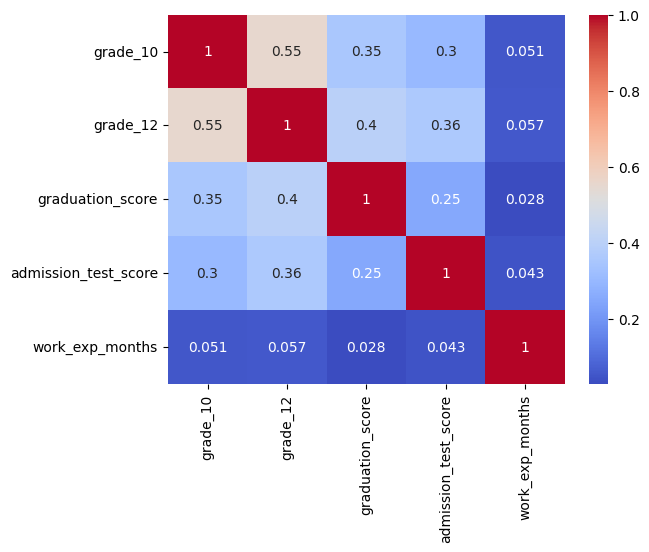

In [33]:
# Create a new dataframe with only the features
X = df[["grade_10", "grade_12", "graduation_score", "admission_test_score", "work_exp_months"]]

# Compute the correlation matrix
corr_matrix = X.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [34]:
# Take user input for the features of an unseen data point
gender = input("Gender (0 for male, 1 for female): ")
grade_10 = float(input("Grade 10 percentage: "))
grade_12 = float(input("Grade 12 percentage: "))
graduation_score = float(input("Graduation score: "))
graduation_type = input("Graduation type (0 for engineer, 1 for non-engineer): ")
admission_test_score = float(input("Admission test score: "))
work_exp_months = float(input("Work experience in months: "))
category_General = input("Category General (0 or 1): ")
category_NC_OBC = input("Category NC-OBC (0 or 1): ")
category_SC = input("Category SC (0 or 1): ")
category_ST = input("Category ST (0 or 1): ")

Gender (0 for male, 1 for female): 1
Grade 10 percentage: 0.96
Grade 12 percentage: 0.94
Graduation score: 0.83
Graduation type (0 for engineer, 1 for non-engineer): 1
Admission test score: 0.9954
Work experience in months: 0.4
Category General (0 or 1): 0
Category NC-OBC (0 or 1): 1
Category SC (0 or 1): 0
Category ST (0 or 1): 0


In [36]:
# Create a new dataframe with the user input
unseen_data = pd.DataFrame({
    "gender": [int(gender)],
    "grade_10": [grade_10],
    "grade_12": [grade_12],
    "graduation_score": [graduation_score],
    "graduation_type": [int(graduation_type)],
    "admission_test_score": [admission_test_score],
    "work_exp_months": [work_exp_months],
    "category_General": [int(category_General)],
    "category_NC_OBC": [int(category_NC_OBC)],
    "category_SC": [int(category_SC)],
    "category_ST": [int(category_ST)]
})

In [37]:
# Make a prediction on the unseen data point
prediction1 = model1.predict(unseen_data)
prediction2 = model2.predict(unseen_data)
prediction3 = model3.predict(unseen_data)
prediction4 = model4.predict(unseen_data)
prediction5 = model5.predict(unseen_data)
prediction6 = model6.predict(unseen_data)

# Print the predicted label
print(f"The predicted label is: {prediction1[0]}")
print(f"The predicted label is: {prediction2[0]}")
print(f"The predicted label is: {prediction3[0]}")
print(f"The predicted label is: {prediction4[0]}")
print(f"The predicted label is: {prediction5[0]}")
print(f"The predicted label is: {prediction6[0]}")

The predicted label is: 0
The predicted label is: 0
The predicted label is: 0
The predicted label is: 0
The predicted label is: 1
The predicted label is: 0


In [24]:
# Using the Le Wagon Exercise Code for University 1

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Create the feature set
X = df[["gender", "grade_10", "grade_12", "graduation_score", 
            "graduation_type", "admission_test_score", 
            "work_exp_months", "category_General", "category_NC_OBC", 
            "category_SC", "category_ST"]]
y = df["shortlist_uni_1"]

# Instanciate model
model1 = LogisticRegression(max_iter=1000)

# 5-Fold Cross validate model
cv_results = cross_validate(model1, X, y, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()
accuracy

0.9032994923857867

In [23]:
# Using the Le Wagon Exercise Code for University 2

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Create the feature set
X = df[["gender", "grade_10", "grade_12", "graduation_score", 
            "graduation_type", "admission_test_score", 
            "work_exp_months", "category_General", "category_NC_OBC", 
            "category_SC", "category_ST"]]
y = df["shortlist_uni_2"]

# Instanciate model
model2 = LogisticRegression(max_iter=1000)

# 5-Fold Cross validate model
cv_results = cross_validate(model2, X, y, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()

accuracy

0.8670050761421321

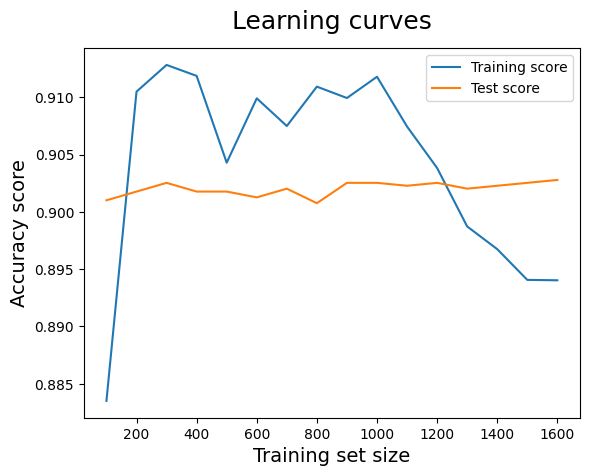

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [100,200,300,400,500,600,700,800,900,1000, 1100, 1200, 1300, 1400, 1500, 1600], 
                                                              cv = 20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [25]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Instanciate the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(np.array(X), y)

# Use the trained model to predict
prediction = log_model.predict([[1, 0.99, 0.99, 0.99, 1, 0.9999, 0.99, 0, 0, 0, 1]])[0]
prediction

0

In [26]:
# Access probability of class 1 in model attributes
probability = log_model.predict_proba([[1, 0.96, 0.97, 0.89, 1, 0.9925, 0.5, 0, 1, 0, 0]])[0][1]

probability

0.0011640868554042667

/Users/prasadsawant/.pyenv/versions/3.10.6/envs/final_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


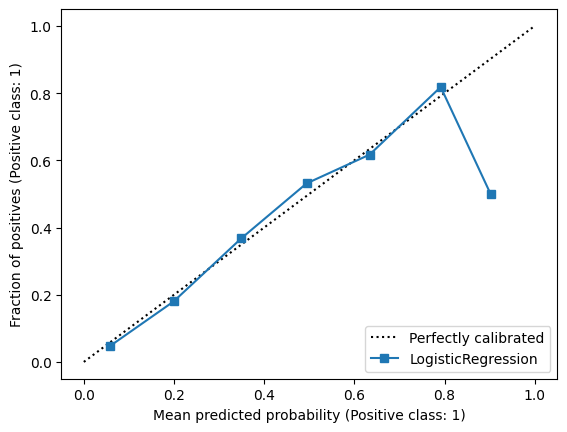

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=1)

# Fit a model on the train set
# $DELETE_BEGIN
model = LogisticRegression().fit(X_train, y_train)
# $DELETE_END

# Print calibration curve on the test set
# $DELETE_BEGIN
disp = CalibrationDisplay.from_estimator(model, X_test, y_test, n_bins=7)
# $DELETE_END

In [28]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(base_estimator=model)
calibrated_model.fit(X_train, y_train)

/Users/prasadsawant/.pyenv/versions/3.10.6/envs/final_project/lib/python3.10/site-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/prasadsawant/.pyenv/versions/3.10.6/envs/final_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/prasadsawant/.pyenv/versions/3.10.6/envs/final_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

CalibratedClassifierCV(base_estimator=LogisticRegression())

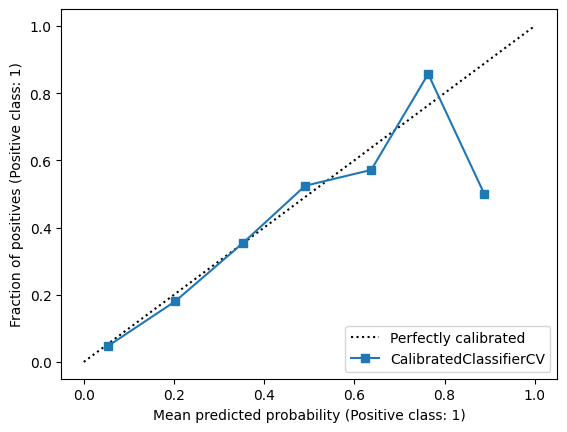

In [29]:
disp = CalibrationDisplay.from_estimator(calibrated_model, X_test, y_test, n_bins=7)